In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
frames = []
framescol = []

filepath = "fish.mp4"

cap = cv2.VideoCapture(filepath)
ret = True
while ret:
    ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
    if ret:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        frames.append(img_gray)
        framescol.append(img)
#     print(img)
video = np.stack(frames, axis=0) # dimensions (T, H, W, C)
videocol = np.stack(framescol, axis=0)

# print(video)


[[16. 16. 16. ...  9.  9.  9.]
 [16. 17. 16. ...  9.  9.  9.]
 [17. 18. 18. ...  9.  9.  9.]
 ...
 [43. 41. 35. ...  0.  0.  0.]
 [43. 41. 38. ...  1.  1.  0.]
 [44. 44. 43. ... 12. 11.  6.]]


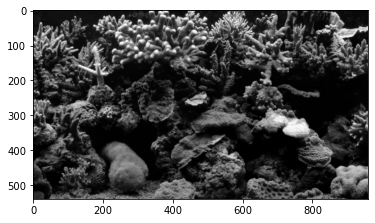

In [4]:
median = np.median(video, axis = 0)
print(median)
plt.imshow(median, cmap='gray')
plt.show()

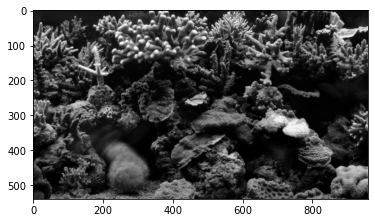

In [5]:
mean = np.mean(video, axis=0)
plt.imshow(mean, cmap = 'gray')
plt.show()


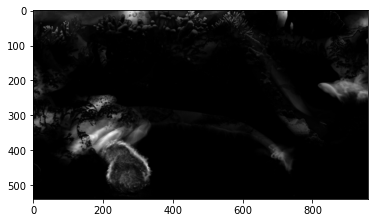

In [6]:
variance = np.var(video, axis=0)
plt.imshow(variance, cmap = 'gray')
plt.show()

/var/folders/r5/lnw8sszn6w7gb92cnh9v0kk40000gn/T/ipykernel_28391/361283127.py:7: RuntimeWarning: divide by zero encountered in log
  Q = C * np.log(1 + img)


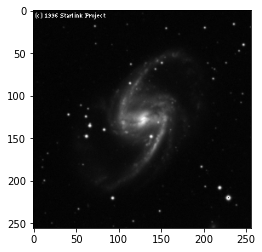

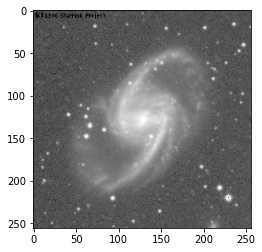

In [7]:
imgpath = "str2.png"

img = cv2.imread(imgpath)

C = 255 / np.log(1 + np.max(img))

Q = C * np.log(1 + img)

log_image = np.array(Q, dtype = np.uint8)
   
# Display both images

plt.imshow(img)
plt.show()
plt.imshow(log_image)
plt.show()

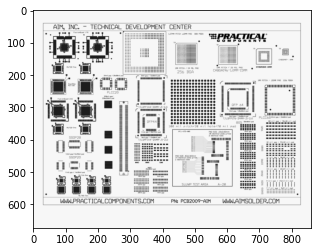

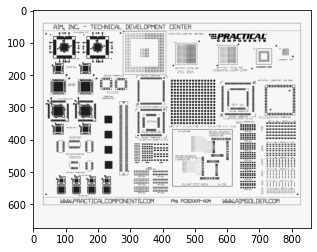

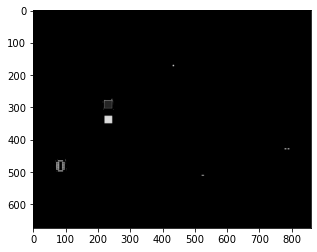

In [8]:
imgonepath = "circuitBoard1.png"
imgtwopath = "circuitBoard2.png"



image1 = cv2.imread(imgonepath)
image2 = cv2.imread(imgtwopath)


# image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# differenceimage = np.abs(image2 - image1)
differenceimage = image1-image2

# gray1 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
# gray2 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# (score, difference) = compare_ssim(gray1, gray2, full=True)
# difference = (difference * 255).astype("uint8")
# print(score)


# print(differenceimage)
plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()

plt.imshow(differenceimage)
plt.show()

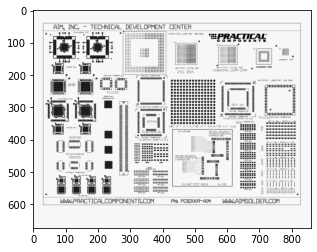

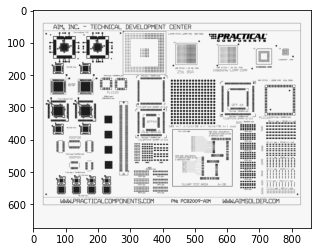

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


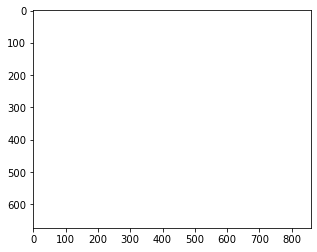

In [9]:
# Read image
img1 = plt.imread(imgonepath)
img2 = plt.imread(imgtwopath)


# img1 = np.array(img1)
# img2 = np.array(img2)
# print(diff)
  
# Output Images
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

diff = img2 - img1
plt.imshow(diff)
plt.show()

(740,)


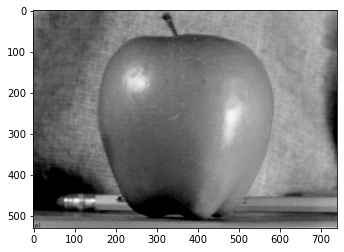

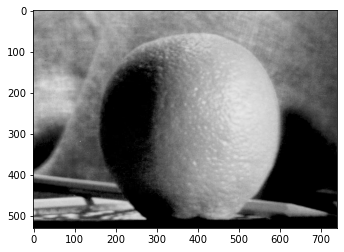

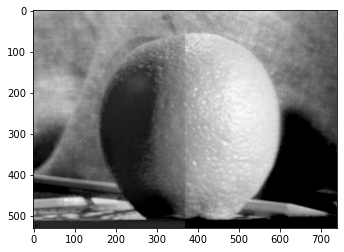

In [10]:
#C = (1-alpha)*image1+alpha*image2
apple1 = "burt_apple.png"
apple2 = "burt_orange.png"

imgapple1 = cv2.imread(apple1,0)
imgapple2 = cv2.imread(apple2,0)

# print(imgapple1.shape)

#sigmoid s(x,y) = 1 / (1 + e^-x)

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))


x = np.linspace(0,740,740)

# x1 = np.arange(0, len(imgapple1[0]),1)
# y1 = np.arange(0, len(imgapple1),1)
# xx, yy = np.meshgrid(x1, y1, sparse=True)

x[:370] = sigmoid(x[:370])

print(x.shape)
# print(yy)

alpha = sigmoid(x)

# print(alpha)

alpha = np.tile(alpha, (530,1))

plt.imshow(imgapple1, cmap='gray')
plt.show()

plt.imshow(imgapple2, cmap='gray')
plt.show()

# print(alpha)
# print(imgapple2)

# alpha.reshape(530,740,3)

C = (1-alpha)*imgapple1+ alpha*imgapple2
# plt.imshow(alpha, cmap='gray')
plt.imshow(C, cmap='gray')
plt.show()